In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pandas_profiling
import plotly.express as px

In [2]:
anime= pd.read_csv("/content/anime.csv")

#Introducción

Esta es una base de datos con información sobre 17.562 animes y la preferencia de 325.772 diferentes usuarios extraída del sitio web MyAnimeList.com

#Variables

* MAL_ID: ID. 
* Name: nombre original. Variable categórica. 
* Score: puntaje promedio. Variable numérica continua. 
* Genres: géneros. Variable categórica.
* English name: nombre en inglés. Variable categórica. 
* Japanese name: nombre escrito en caracteres japoneses. Variable categórica.
* Type: tipo del contenido audiovisual. Variable categórica. 
* Episodes: cantidad de episodios. Variable numérica discreta. 
* Aired: fecha de inicio y fecha de finalización. Variable de tiempo.
* Premiered: temporada y año de estreno. Variable ???.
* Producers: productores. Variable categórica. 
* Licensors: licenciadores. Variable categórica. 
* Studios: estudio. Variable categórica. 
* Source: fuente. Variable Categórica. 
* Duration: duración. Variable ¿de tiempo?. 
* Rating: clasificación por edad. Variable categórica.
* Ranked: número de puesto en el ranking total. Variable numérica discreta. 
* Popularity: popularidad. Variable numérica discreta. 
* Members: número de miembros que lo incluyeron en alguna lista. Variable numérica discreta. 
* Favorites: número de miembros que lo incluyeron en Favorites. Variable numérica discreta.
* Watching: número de miembros que lo incluyeron en Watching. Variable numérica discreta.
* Completed: número de miembros que lo incluyeron en Completed. Variable numérica discreta.
* On- Hold: número de miembros que lo incluyeron en On- Hold. Variable numérica discreta.
* Dropped: número de miembros que lo incluyeron en Dropped. Variable numérica discreta.
* Plan to Watch: número de miembros que lo incluyeron en Plan tu Watch. Variable numérica discreta.
* Score-10: número de miembros que lo puntuaron con 10. Variable numérica discreta.
* Score-9: número de miembros que lo puntuaron con 9. Variable numérica discreta.
* Score-8: número de miembros que lo puntuaron con 8. Variable numérica discreta.
* Score-7: número de miembros que lo puntuaron con 7. Variable numérica discreta.
* Score-6: número de miembros que lo puntuaron con 6. Variable numérica discreta.
* Score-5: número de miembros que lo puntuaron con 5. Variable numérica discreta.
* Score-4: número de miembros que lo puntuaron con 4. Variable numérica discreta.
* Score-3: número de miembros que lo puntuaron con 3. Variable numérica discreta.
* Score-2: número de miembros que lo puntuaron con 2. Variable numérica discreta.
* Score-1: número de miembros que lo puntuaron con 1. Variable numérica discreta.

In [3]:
pd.set_option('max_columns', None)
anime.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [4]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [5]:
anime2= anime.drop(['Japanese name'], axis= 1)

In [6]:
pd.set_option('max_columns', None)
anime2.head(5)

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [7]:
anime2_new= anime2['Aired'].str.split(('to'), expand= True)
anime2_1= anime2_new.iloc[:,0]
anime2_2= anime2_new.iloc[:,1]
anime2['Start date']=anime2_1
anime2['End date']=anime2_2
pd.set_option('max_columns', None)
anime2.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Start date,End date
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"Apr 3, 1998","Apr 24, 1999"
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"Sep 1, 2001",None
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Apr 1, 1998","Sep 30, 1998"
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,"Jul 2, 2002","Dec 24, 2002"
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,"Sep 30, 2004","Sep 29, 2005"


In [8]:
anime2=anime2.drop(['Aired'], axis=1)

In [9]:
anime3= anime2

In [10]:
anime3.head(5)

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Start date,End date
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"Apr 3, 1998","Apr 24, 1999"
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"Sep 1, 2001",None
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Apr 1, 1998","Sep 30, 1998"
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,"Jul 2, 2002","Dec 24, 2002"
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,"Sep 30, 2004","Sep 29, 2005"


In [11]:
anime3_new= anime3['Premiered'].str.split((' '), expand= True)
anime3_1= anime3_new.iloc[:,0]
anime3_2= anime3_new.iloc[:,1]
anime3['Season']=anime3_1
anime3['Year']=anime3_2
pd.set_option('max_columns', None)
anime3.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Start date,End date,Season,Year
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"Apr 3, 1998","Apr 24, 1999",Spring,1998
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"Sep 1, 2001",None,Unknown,None
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Apr 1, 1998","Sep 30, 1998",Spring,1998
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,"Jul 2, 2002","Dec 24, 2002",Summer,2002
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,"Sep 30, 2004","Sep 29, 2005",Fall,2004


In [12]:
anime4=anime3.drop(['Premiered'], axis=1)

In [13]:
anime4_new= anime4['Genres'].str.split((','), expand= True)
anime4_1= anime4_new.iloc[:,0]
anime4_2= anime4_new.iloc[:,1]
anime4['Genre 1']=anime4_1
anime4['Genre 2']=anime4_2
pd.set_option('max_columns', None)
anime4.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Start date,End date,Season,Year,Genre 1,Genre 2
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"Apr 3, 1998","Apr 24, 1999",Spring,1998,Action,Adventure
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"Sep 1, 2001",None,Unknown,None,Action,Drama
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Apr 1, 1998","Sep 30, 1998",Spring,1998,Action,Sci-Fi
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,"Jul 2, 2002","Dec 24, 2002",Summer,2002,Action,Mystery
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,"Sep 30, 2004","Sep 29, 2005",Fall,2004,Adventure,Fantasy


In [14]:
dfanime=anime4.drop(['Genres'], axis=1)

In [15]:
dfanime.head(5)

,MAL_ID,Name,Score,English name,Type,Episodes,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Start date,End date,Season,Year,Genre 1,Genre 2
0,1,Cowboy Bebop,8.78,Cowboy Bebop,TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"Apr 3, 1998","Apr 24, 1999",Spring,1998,Action,Adventure
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Cowboy Bebop:The Movie,Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"Sep 1, 2001",None,Unknown,None,Action,Drama
2,6,Trigun,8.24,Trigun,TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Apr 1, 1998","Sep 30, 1998",Spring,1998,Action,Sci-Fi
3,7,Witch Hunter Robin,7.27,Witch Hunter Robin,TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,"Jul 2, 2002","Dec 24, 2002",Summer,2002,Action,Mystery
4,8,Bouken Ou Beet,6.98,Beet the Vandel Buster,TV,52,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,"Sep 30, 2004","Sep 29, 2005",Fall,2004,Adventure,Fantasy


In [16]:
dfanime.tail(5)

,MAL_ID,Name,Score,English name,Type,Episodes,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Start date,End date,Season,Year,Genre 1,Genre 2
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,Unknown,ONA,Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"Apr 4, 2021",?,Unknown,None,Adventure,Mystery
17558,48483,Mieruko-chan,Unknown,Unknown,TV,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2021,?,Unknown,None,Comedy,Horror
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,Higurashi:When They Cry – SOTSU,TV,Unknown,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"Jul, 2021",?,Summer,2021,Mystery,Dementia
17560,48491,Yama no Susume: Next Summit,Unknown,Unknown,TV,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,None,Unknown,None,Adventure,Slice of Life
17561,48492,Scarlet Nexus,Unknown,Unknown,TV,Unknown,Bandai Namco Arts,Unknown,Sunrise,Game,Unknown,Unknown,Unknown,17563,310,0,4,0,1,1,304,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"Jul, 2021",?,Summer,2021,Action,Fantasy


In [17]:
dfanime.shape

(17562, 37)

El dataset está compuesto por 17562 filas y 34 columnas

In [18]:
dfanime.dtypes

MAL_ID            int64
Name             object
Score            object
English name     object
Type             object
Episodes         object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
Start date       object
End date         object
Season           object
Year             object
Genre 1          object
Genre 2          object
dtype: object

In [19]:
dfanime.isnull().sum()

MAL_ID               0
Name                 0
Score                0
English name         0
Type                 0
Episodes             0
Producers            0
Licensors            0
Studios              0
Source               0
Duration             0
Rating               0
Ranked               0
Popularity           0
Members              0
Favorites            0
Watching             0
Completed            0
On-Hold              0
Dropped              0
Plan to Watch        0
Score-10             0
Score-9              0
Score-8              0
Score-7              0
Score-6              0
Score-5              0
Score-4              0
Score-3              0
Score-2              0
Score-1              0
Start date           0
End date          9108
Season               0
Year             12817
Genre 1              0
Genre 2           4292
dtype: int64

In [20]:
# Revision de valores misssings o nulos - Valores relativos
dfanime.isnull().sum()/dfanime.shape[0]*100

MAL_ID            0.000000
Name              0.000000
Score             0.000000
English name      0.000000
Type              0.000000
Episodes          0.000000
Producers         0.000000
Licensors         0.000000
Studios           0.000000
Source            0.000000
Duration          0.000000
Rating            0.000000
Ranked            0.000000
Popularity        0.000000
Members           0.000000
Favorites         0.000000
Watching          0.000000
Completed         0.000000
On-Hold           0.000000
Dropped           0.000000
Plan to Watch     0.000000
Score-10          0.000000
Score-9           0.000000
Score-8           0.000000
Score-7           0.000000
Score-6           0.000000
Score-5           0.000000
Score-4           0.000000
Score-3           0.000000
Score-2           0.000000
Score-1           0.000000
Start date        0.000000
End date         51.861975
Season            0.000000
Year             72.981437
Genre 1           0.000000
Genre 2          24.439130
d

In [21]:
dfanime.columns

Index(['MAL_ID', 'Name', 'Score', 'English name', 'Type', 'Episodes',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Ranked', 'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped', 'Plan to Watch', 'Score-10', 'Score-9', 'Score-8',
       'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2',
       'Score-1', 'Start date', 'End date', 'Season', 'Year', 'Genre 1',
       'Genre 2'],
      dtype='object')

In [22]:
columnsNumeric= ['Score', 'Episodes', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1']

columnsString= ['Name', 'English name',
       'Type', 'Producers', 'Licensors',
       'Studios','Rating', 'Source', 'Start date', 'End date','Season', 'Year', 'Genre 1', 'Genre 2']

In [23]:
dfanime[columnsString].describe().T

,count,unique,top,freq
Name,17562,17558,Maou Gakuin no Futekigousha: Shijou Saikyou no...,3
English name,17562,6831,Unknown,10565
Type,17562,7,TV,4996
Producers,17562,3783,Unknown,7794
Licensors,17562,231,Unknown,13616
Studios,17562,1090,Unknown,7079
Rating,17562,7,PG-13 - Teens 13 or older,6132
Source,17562,16,Original,5215
Start date,17562,9180,Unknown,309
End date,8454,4337,?,525


In [24]:
dfanime[columnsNumeric]= dfanime[columnsNumeric].replace({"Unknown": "NaN"})

Cambio los valores Unknown por NaN para después poder imputarlos por machine learning pero solamente en las variables numéricas ya que para las variables categóricas el valor Unknown va a ser una categoría más.

In [25]:
dfanime[columnsString]= dfanime[columnsString].replace({None: "Unknown"})

Los valores que quedaron nulos por los splits los reemplazo por unknown

In [26]:
# Usamos los metodos de imputacion con Machine Learning
from sklearn.impute import SimpleImputer
# Generamos el imputador iterativo - Imputacion Univariada Numerica
imp_univ_num = SimpleImputer(missing_values=np.nan, strategy='mean')

In [27]:
data_impt_num = dfanime[columnsNumeric] # DataSet de solo numericas

In [28]:
# Realizamos la imputación univariada en una nueva base de datos - Variables Numericas
imp_univ_num.fit(data_impt_num) # Ajustar, entender
imputed_data_univ_num = pd.DataFrame(data=imp_univ_num.transform(data_impt_num), # Aplicar o predecir
                             columns=data_impt_num.columns,dtype='float')

In [29]:
dfanime_imp  = pd.concat([imputed_data_univ_num,dfanime[columnsString]],axis=1)

In [30]:
dfanime_imp.dtypes

Score            float64
Episodes         float64
Ranked           float64
Popularity       float64
Members          float64
Favorites        float64
Watching         float64
Completed        float64
On-Hold          float64
Dropped          float64
Plan to Watch    float64
Score-10         float64
Score-9          float64
Score-8          float64
Score-7          float64
Score-6          float64
Score-5          float64
Score-4          float64
Score-3          float64
Score-2          float64
Score-1          float64
Name              object
English name      object
Type              object
Producers         object
Licensors         object
Studios           object
Rating            object
Source            object
Start date        object
End date          object
Season            object
Year              object
Genre 1           object
Genre 2           object
dtype: object

In [31]:
dfanime_imp.isnull().sum()

Score            0
Episodes         0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
Name             0
English name     0
Type             0
Producers        0
Licensors        0
Studios          0
Rating           0
Source           0
Start date       0
End date         0
Season           0
Year             0
Genre 1          0
Genre 2          0
dtype: int64

In [32]:
dfanime_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,17562.0,6.509999,0.745712,1.85,6.20,6.509999,6.860000,9.19
Episodes,17562.0,11.525519,46.647824,1.00,1.00,2.000000,12.000000,3057.00
Ranked,17562.0,7895.210000,4322.644883,0.00,4386.25,7895.210000,11408.000000,15780.00
Popularity,17562.0,8763.452340,5059.327278,0.00,4383.50,8762.500000,13145.000000,17565.00
Members,17562.0,34658.539517,125282.141428,1.00,336.00,2065.000000,13223.250000,2589552.00
Favorites,17562.0,457.746270,4063.473313,0.00,0.00,3.000000,31.000000,183914.00
Watching,17562.0,2231.487758,14046.688133,0.00,13.00,73.000000,522.000000,887333.00
Completed,17562.0,22095.571347,91009.188504,0.00,111.00,817.500000,6478.000000,2182587.00
On-Hold,17562.0,955.049653,4275.675096,0.00,6.00,45.000000,291.750000,187919.00
Dropped,17562.0,1176.599533,4740.348653,0.00,37.00,77.000000,271.000000,174710.00


#Análisis univariado

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


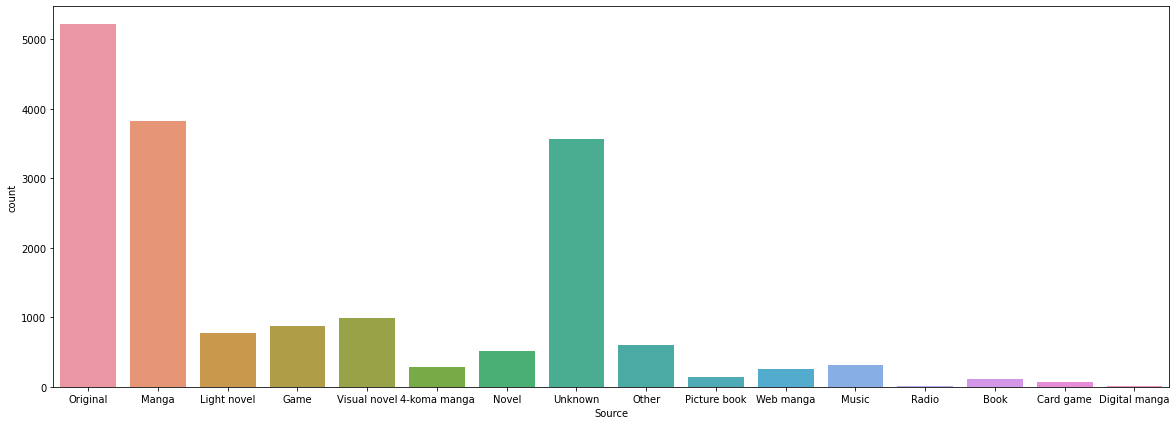

In [33]:
plt.figure(figsize=(20,7)); 
sns.countplot(dfanime_imp['Source'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


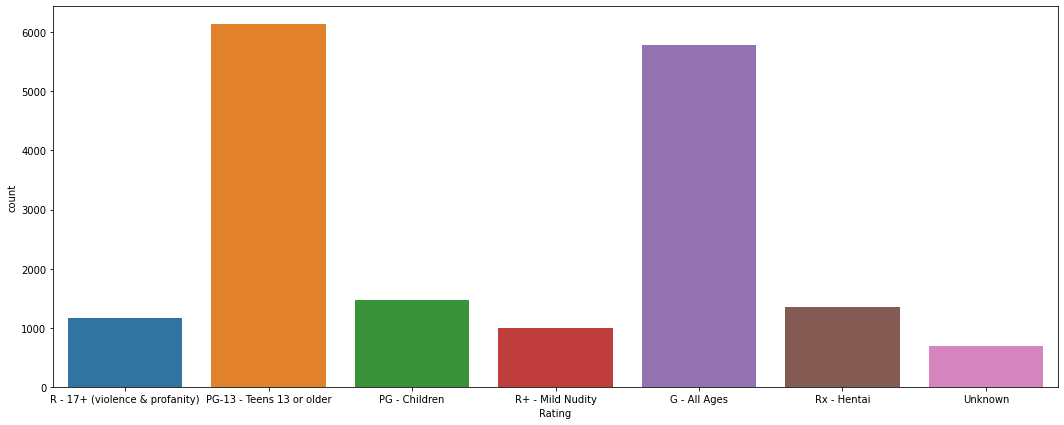

In [34]:
plt.figure(figsize=(18,7)); 
sns.countplot(dfanime_imp['Rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


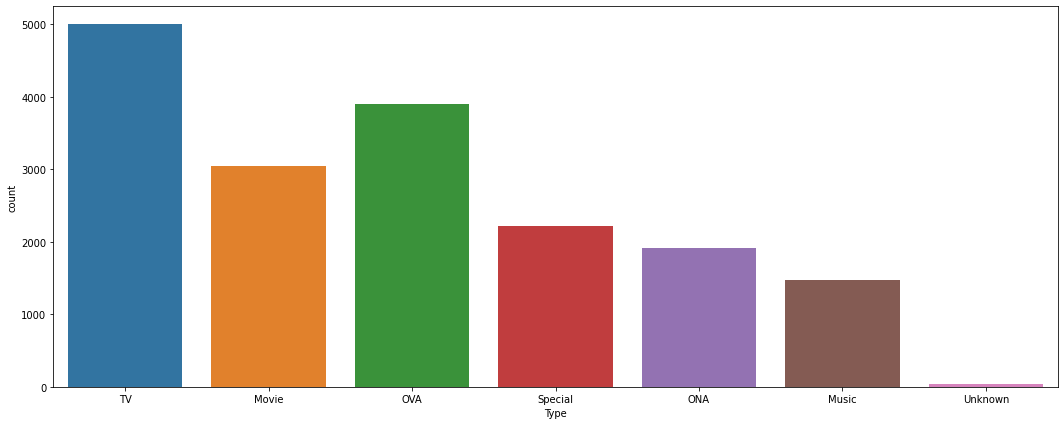

In [35]:
plt.figure(figsize=(18,7)); 
sns.countplot(dfanime_imp['Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


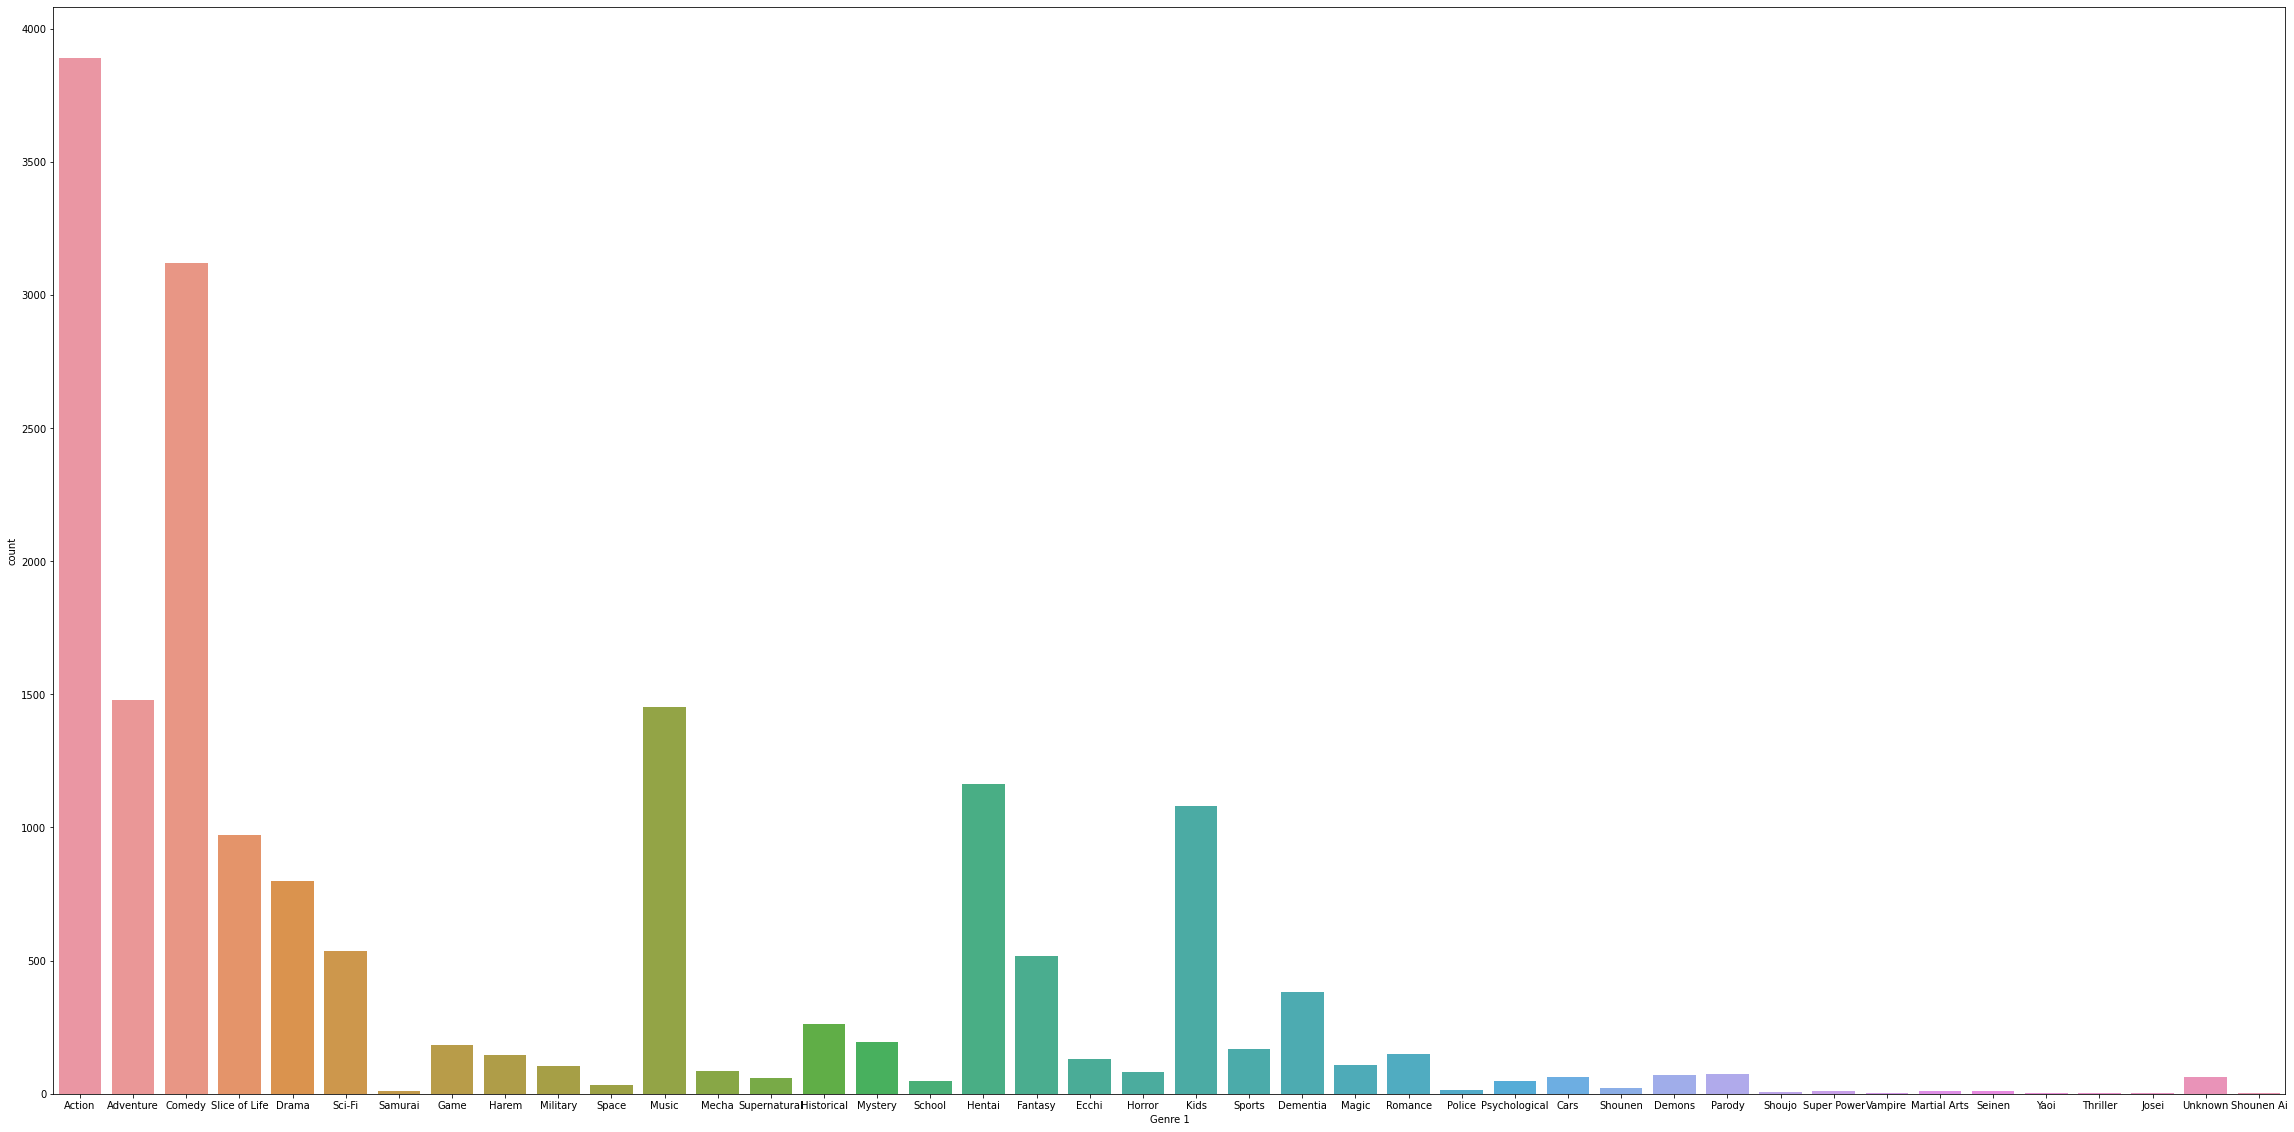

In [36]:
plt.figure(figsize=(40,20)); 
sns.countplot(dfanime_imp['Genre 1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


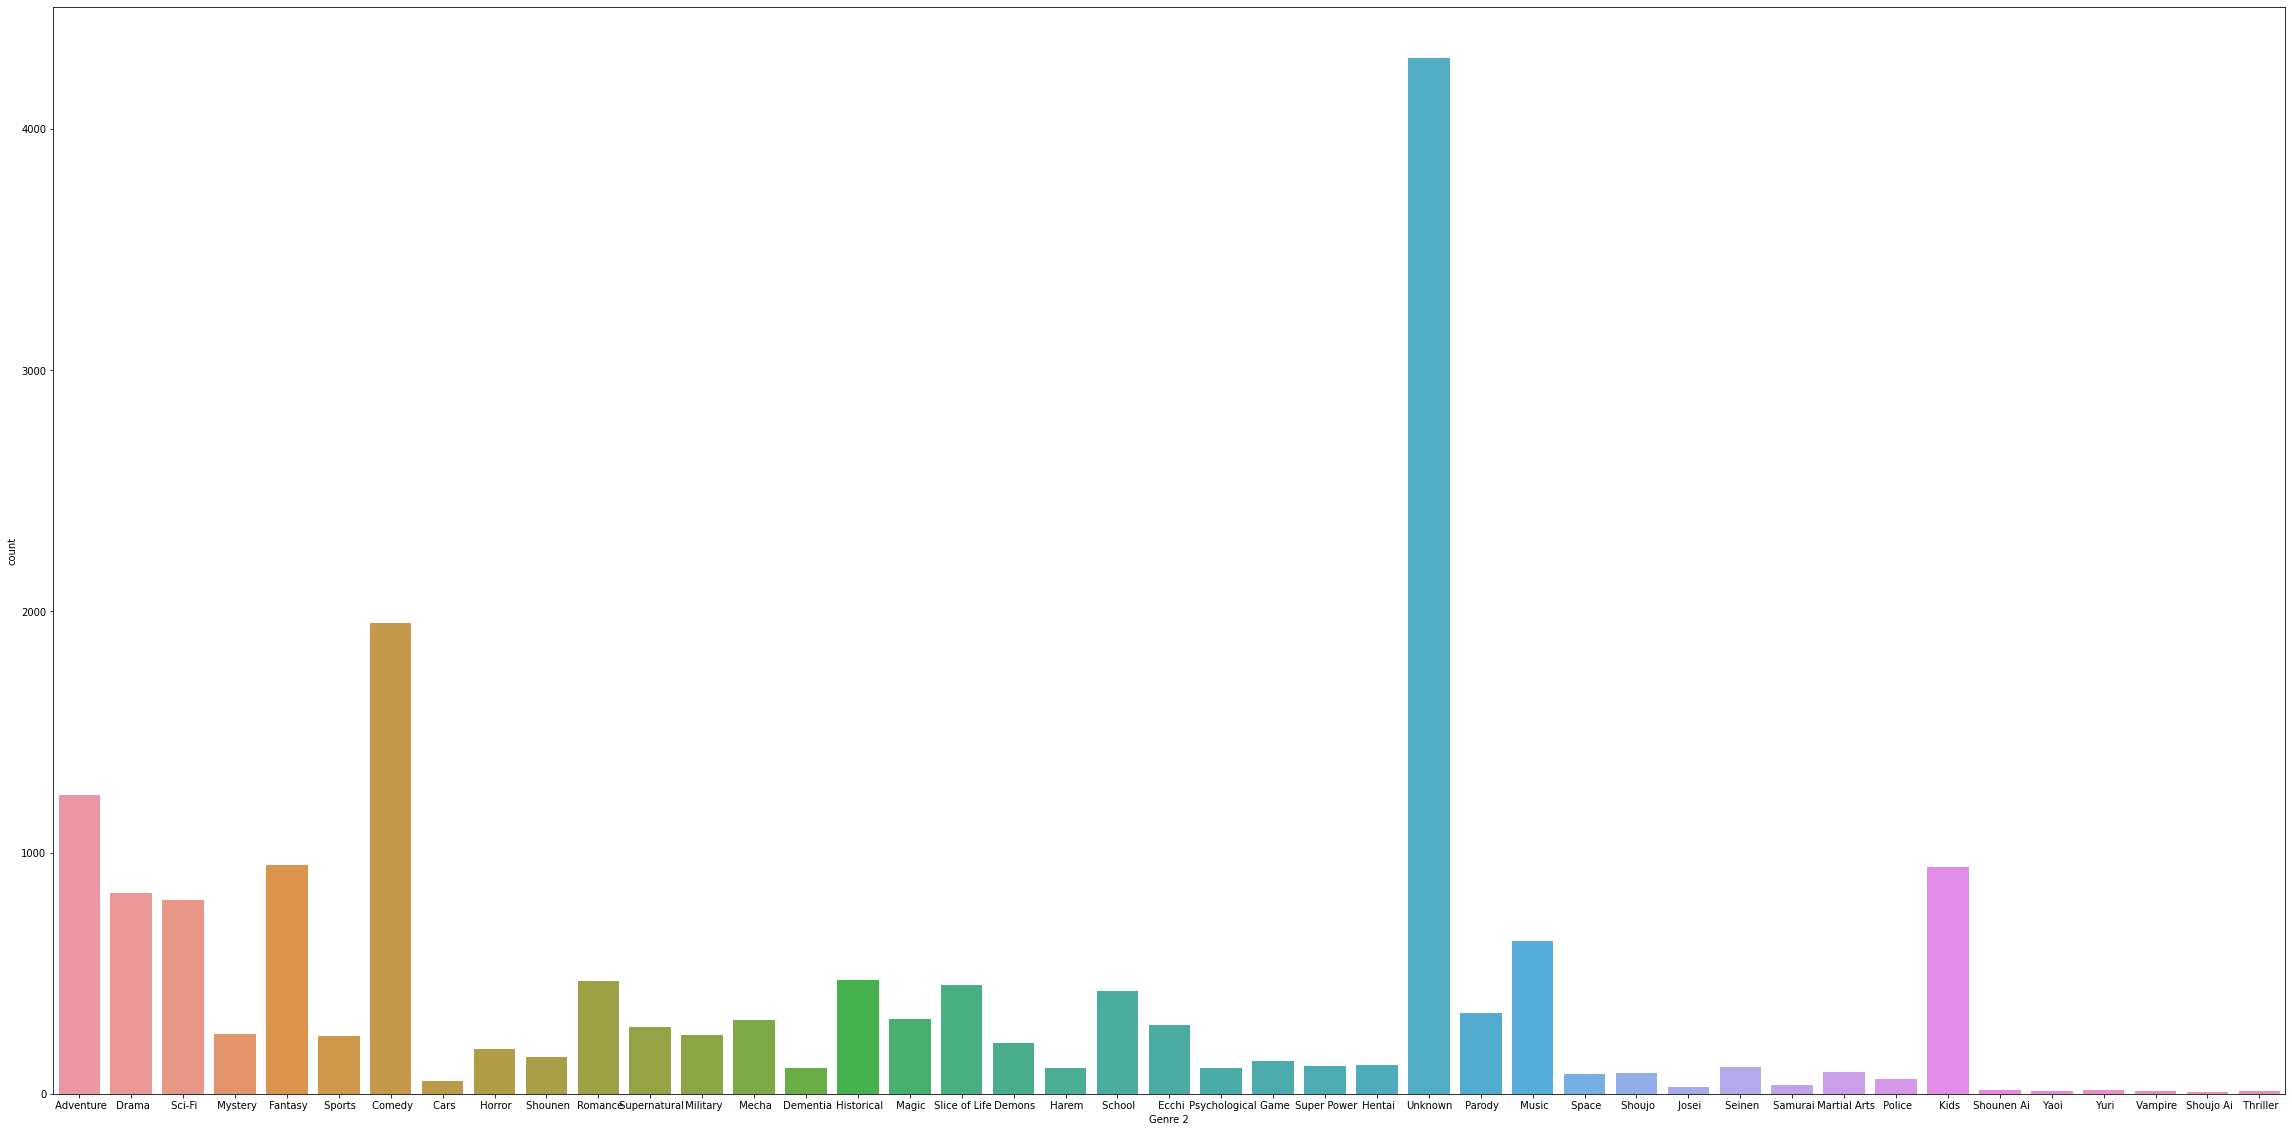

In [37]:
plt.figure(figsize=(40,20)); 
sns.countplot(dfanime_imp['Genre 2'])

La mayoría de los anime son de acción o de comedia.

In [38]:
#Agrupar columnas Score (de 1 a 10) - Aca podemos ver datos estadisticos de puntuaciones de usuarios
scores = ['Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1']
dfanime_imp[scores].describe()

,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
count,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000
mean,2546.182715,3905.437027,4846.905194,3997.244329,1964.125682,990.303982,453.539162,212.773547,128.395240,123.075250
std,16867.963072,18008.954681,19777.603965,14069.199957,6367.306676,3201.670173,1699.319860,843.750787,547.031959,665.797407
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,11.000000,9.000000,12.000000,17.000000,20.000000,11.000000,8.000000,6.000000,6.000000
50%,43.000000,177.000000,140.000000,162.000000,162.500000,123.000000,58.000000,34.000000,22.000000,17.000000
75%,469.000000,3905.437027,2423.500000,1757.750000,1159.750000,656.750000,310.000000,169.000000,114.000000,63.000000
max,714811.000000,535252.000000,459113.000000,303813.000000,188431.000000,124819.000000,81155.000000,44204.000000,25371.000000,33750.000000


***Distribución de frecuencias***

 **Distribución de frecuencias absolutas y relativas de la variable de clasificación por edad**. 

In [39]:
frec = dfanime_imp["Rating"].value_counts()
frec

PG-13 - Teens 13 or older         6132
G - All Ages                      5782
PG - Children                     1461
Rx - Hentai                       1345
R - 17+ (violence & profanity)    1157
R+ - Mild Nudity                   997
Unknown                            688
Name: Rating, dtype: int64

Frecuencias absolutas

In [40]:
#Guardamos esta información en un dataframe
frec_df = pd.DataFrame(frec)
frec_df

,Rating
PG-13 - Teens 13 or older,6132
G - All Ages,5782
PG - Children,1461
Rx - Hentai,1345
R - 17+ (violence & profanity),1157
R+ - Mild Nudity,997
Unknown,688


In [41]:
#Asignamos el nombre Frec_abs a la columna
frec_df.rename(columns={'Rating':'Frec_abs'},inplace=True)
frec_df

,Frec_abs
PG-13 - Teens 13 or older,6132
G - All Ages,5782
PG - Children,1461
Rx - Hentai,1345
R - 17+ (violence & profanity),1157
R+ - Mild Nudity,997
Unknown,688


In [42]:
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum
PG-13 - Teens 13 or older,6132,6132
G - All Ages,5782,11914
PG - Children,1461,13375
Rx - Hentai,1345,14720
R - 17+ (violence & profanity),1157,15877
R+ - Mild Nudity,997,16874
Unknown,688,17562


In [43]:
frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(anime2.Rating),4)
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%
PG-13 - Teens 13 or older,6132,6132,34.9163
G - All Ages,5782,11914,32.9234
PG - Children,1461,13375,8.3191
Rx - Hentai,1345,14720,7.6586
R - 17+ (violence & profanity),1157,15877,6.5881
R+ - Mild Nudity,997,16874,5.6770
Unknown,688,17562,3.9175


In [44]:
#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
PG-13 - Teens 13 or older,6132,6132,34.9163,34.9163
G - All Ages,5782,11914,32.9234,67.8397
PG - Children,1461,13375,8.3191,76.1588
Rx - Hentai,1345,14720,7.6586,83.8174
R - 17+ (violence & profanity),1157,15877,6.5881,90.4055
R+ - Mild Nudity,997,16874,5.6770,96.0825
Unknown,688,17562,3.9175,100.0000


Casi el 70% de los anime son aptos para todo público o para mayores de 13 años. 

**Distribución de frecuencias absolutas y relativas de la variable source**


In [45]:
frec2 = dfanime_imp["Source"].value_counts()
frec2

Original         5215
Manga            3825
Unknown          3567
Visual novel      993
Game              880
Light novel       768
Other             597
Novel             510
Music             317
4-koma manga      288
Web manga         252
Picture book      147
Book              112
Card game          64
Digital manga      15
Radio              12
Name: Source, dtype: int64

In [46]:
#Guardamos esta información en un dataframe
frec_df2 = pd.DataFrame(frec2)
frec_df2

,Source
Original,5215
Manga,3825
Unknown,3567
Visual novel,993
Game,880
Light novel,768
Other,597
Novel,510
Music,317
4-koma manga,288


In [47]:
#Asignamos el nombre Frec_abs a la columna
frec_df2.rename(columns={'Source':'Frec_abs'},inplace=True)
frec_df2

,Frec_abs
Original,5215
Manga,3825
Unknown,3567
Visual novel,993
Game,880
Light novel,768
Other,597
Novel,510
Music,317
4-koma manga,288


In [48]:
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val2 = frec_df2["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val2:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df2["frec_abs_acum"] = acum
frec_df2

,Frec_abs,frec_abs_acum
Original,5215,5215
Manga,3825,9040
Unknown,3567,12607
Visual novel,993,13600
Game,880,14480
Light novel,768,15248
Other,597,15845
Novel,510,16355
Music,317,16672
4-koma manga,288,16960


In [49]:
frec_df2["frec_rel_%"] = round(100 * frec_df2["Frec_abs"]/len(anime2.Source),4)
frec_df2

,Frec_abs,frec_abs_acum,frec_rel_%
Original,5215,5215,29.6948
Manga,3825,9040,21.7800
Unknown,3567,12607,20.3109
Visual novel,993,13600,5.6543
Game,880,14480,5.0108
Light novel,768,15248,4.3731
Other,597,15845,3.3994
Novel,510,16355,2.9040
Music,317,16672,1.8050
4-koma manga,288,16960,1.6399


In [50]:
#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val2 = frec_df2["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val2:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df2["frec_rel_%_acum"] = acum
frec_df2

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
Original,5215,5215,29.6948,29.6948
Manga,3825,9040,21.7800,51.4748
Unknown,3567,12607,20.3109,71.7857
Visual novel,993,13600,5.6543,77.4400
Game,880,14480,5.0108,82.4508
Light novel,768,15248,4.3731,86.8239
Other,597,15845,3.3994,90.2233
Novel,510,16355,2.9040,93.1273
Music,317,16672,1.8050,94.9323
4-koma manga,288,16960,1.6399,96.5722


Alrededor del 50% de los animes son originales o están basados en un manga. Hay un 20% que no se sabe con certeza la fuente. Un 5.6% están basados en novelas visuales y un 5% en juegos. 

In [51]:
frec3 = dfanime_imp["Type"].value_counts()
frec3

TV         4996
OVA        3894
Movie      3041
Special    2218
ONA        1907
Music      1469
Unknown      37
Name: Type, dtype: int64

In [52]:
#Guardamos esta información en un dataframe
frec_df3 = pd.DataFrame(frec3)
frec_df3

,Type
TV,4996
OVA,3894
Movie,3041
Special,2218
ONA,1907
Music,1469
Unknown,37


In [53]:
#Asignamos el nombre Frec_abs a la columna
frec_df3.rename(columns={'Type':'Frec_abs'},inplace=True)
frec_df3

,Frec_abs
TV,4996
OVA,3894
Movie,3041
Special,2218
ONA,1907
Music,1469
Unknown,37


In [54]:
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val3 = frec_df3["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val3:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df3["frec_abs_acum"] = acum
frec_df3

,Frec_abs,frec_abs_acum
TV,4996,4996
OVA,3894,8890
Movie,3041,11931
Special,2218,14149
ONA,1907,16056
Music,1469,17525
Unknown,37,17562


In [55]:
frec_df3["frec_rel_%"] = round(100 * frec_df3["Frec_abs"]/len(anime2.Type),4)
frec_df3

,Frec_abs,frec_abs_acum,frec_rel_%
TV,4996,4996,28.4478
OVA,3894,8890,22.1729
Movie,3041,11931,17.3158
Special,2218,14149,12.6295
ONA,1907,16056,10.8587
Music,1469,17525,8.3647
Unknown,37,17562,0.2107


In [56]:
#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val3 = frec_df3["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val3:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df3["frec_rel_%_acum"] = acum
frec_df3

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
TV,4996,4996,28.4478,28.4478
OVA,3894,8890,22.1729,50.6207
Movie,3041,11931,17.3158,67.9365
Special,2218,14149,12.6295,80.5660
ONA,1907,16056,10.8587,91.4247
Music,1469,17525,8.3647,99.7894
Unknown,37,17562,0.2107,100.0001


Alrededor el 28% de los animes son series de televisión y el 22% son OVAs , mientras que un poco más del 17% son películas. El 50% de los anime son series de televisón u OVAs

#Análisis bivariado

[Text(0.5, 1.0, 'Score vs Popularity')]

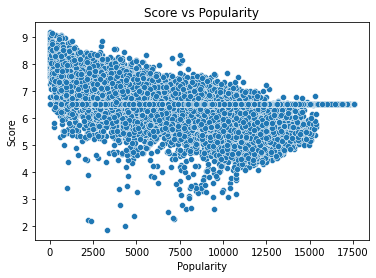

In [57]:
sns.scatterplot(x="Popularity", y="Score", data=dfanime_imp).set(title='Score vs Popularity')

Parece haber una relación constante entre el puntaje del anime y su popularidad. Se podría inferir que la gente no mira los animes por su puntaje. 

[Text(0.5, 1.0, 'Score vs Score-1')]

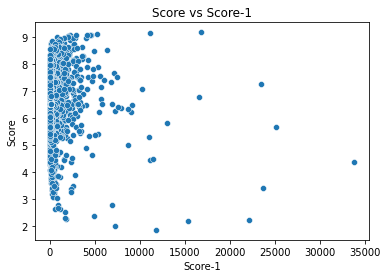

In [58]:
sns.scatterplot(x="Score-1", y="Score", data=dfanime_imp).set(title='Score vs Score-1')

No parece haber relación entre el puntaje y las personas que puntuaron 1.

[Text(0.5, 1.0, 'Score vs Score-10')]

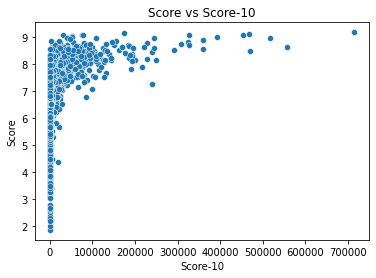

In [59]:
sns.scatterplot(x="Score-10", y="Score", data=dfanime_imp).set(title='Score vs Score-10')

La relación entre el puntaje y las personas que puntuaron 10 es constante para los primeros puntajes y empieza a convertirse en lineal para los últimos.

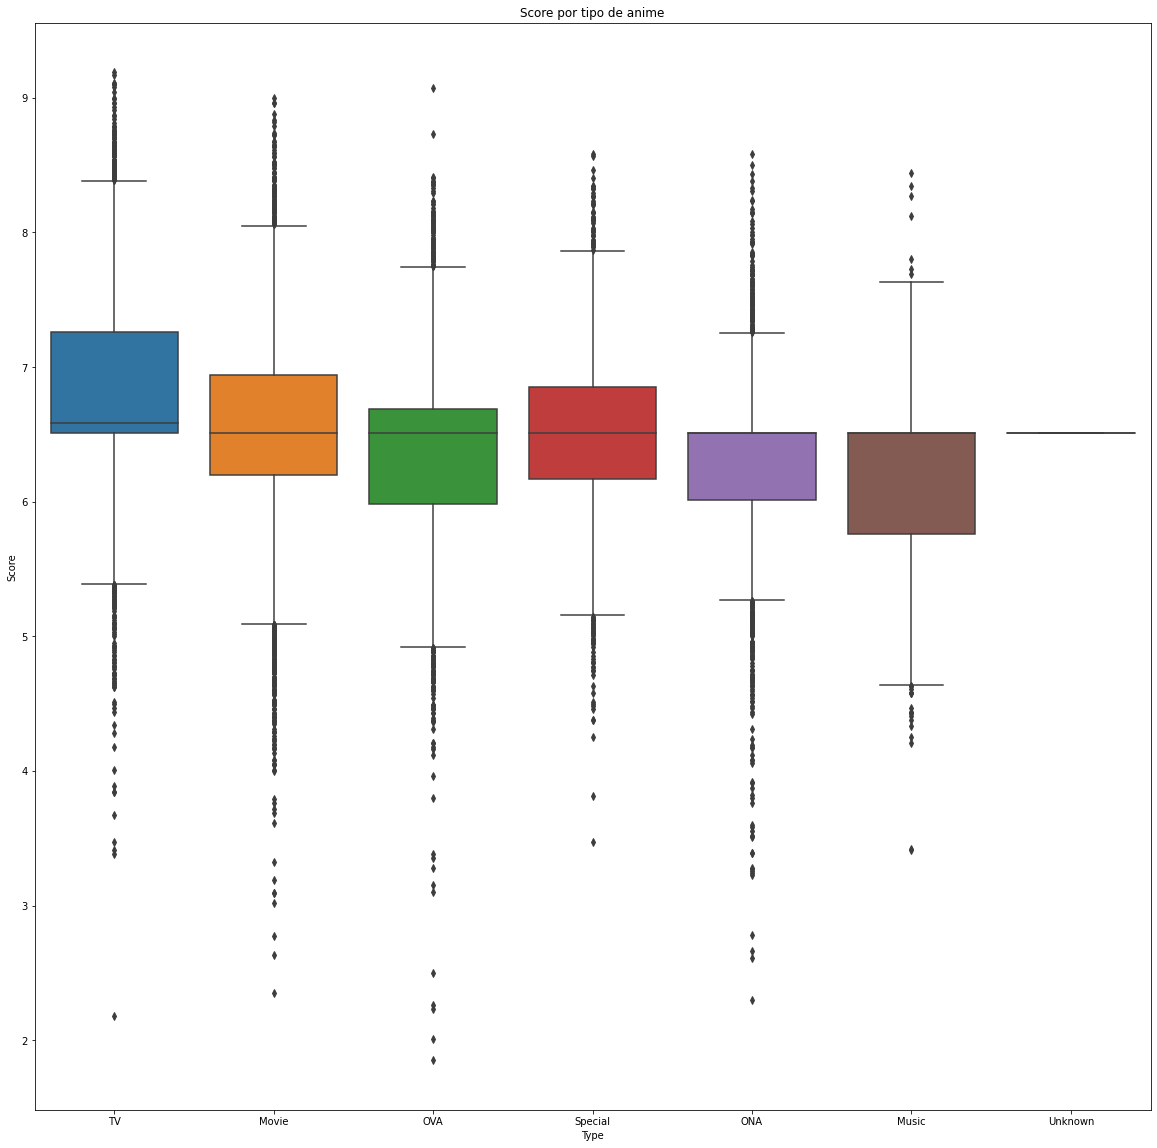

In [60]:
plt.figure(figsize=(20,20)) 
sns.boxplot(y = 'Score', x = 'Type', data = dfanime_imp).set(title='Score por tipo de anime')
plt.show()

In [61]:
fig = px.box(dfanime_imp, x="Type", y="Score")
fig.show()

Si comparamos los tipos de formato con la variable score, que podría ser nuestro target, vemos que todas las categorías presentan outliers. Viendo la caja de la categoría serie de TV podemos observar que su distribución se ubica en los puntajes más altos, comparada con el resto. Se puede concluir que las series de televisión son las mejores puntuadas dentro de los anime. Sin embargo, mirando su mediana, se concluye que su distribución es asimétrica a la derecha y sus valores están concentrados en los valores más chicos de la distribución. Por su parte, la categoría de película tiene su distribución en valores un poco más chicos que serie de televisión, pero su distribución parece más simétrica, encontrándose la mediana casi en el medio de la caja, pero siendo asimétrica a la derecha en defenitiva. La categoría OVA, en cambio, observando la posición de la mediana, tiene una asimetría a la negativa, con sus valores concentrándose a la derecha de la distribución, donde estos son mayores.

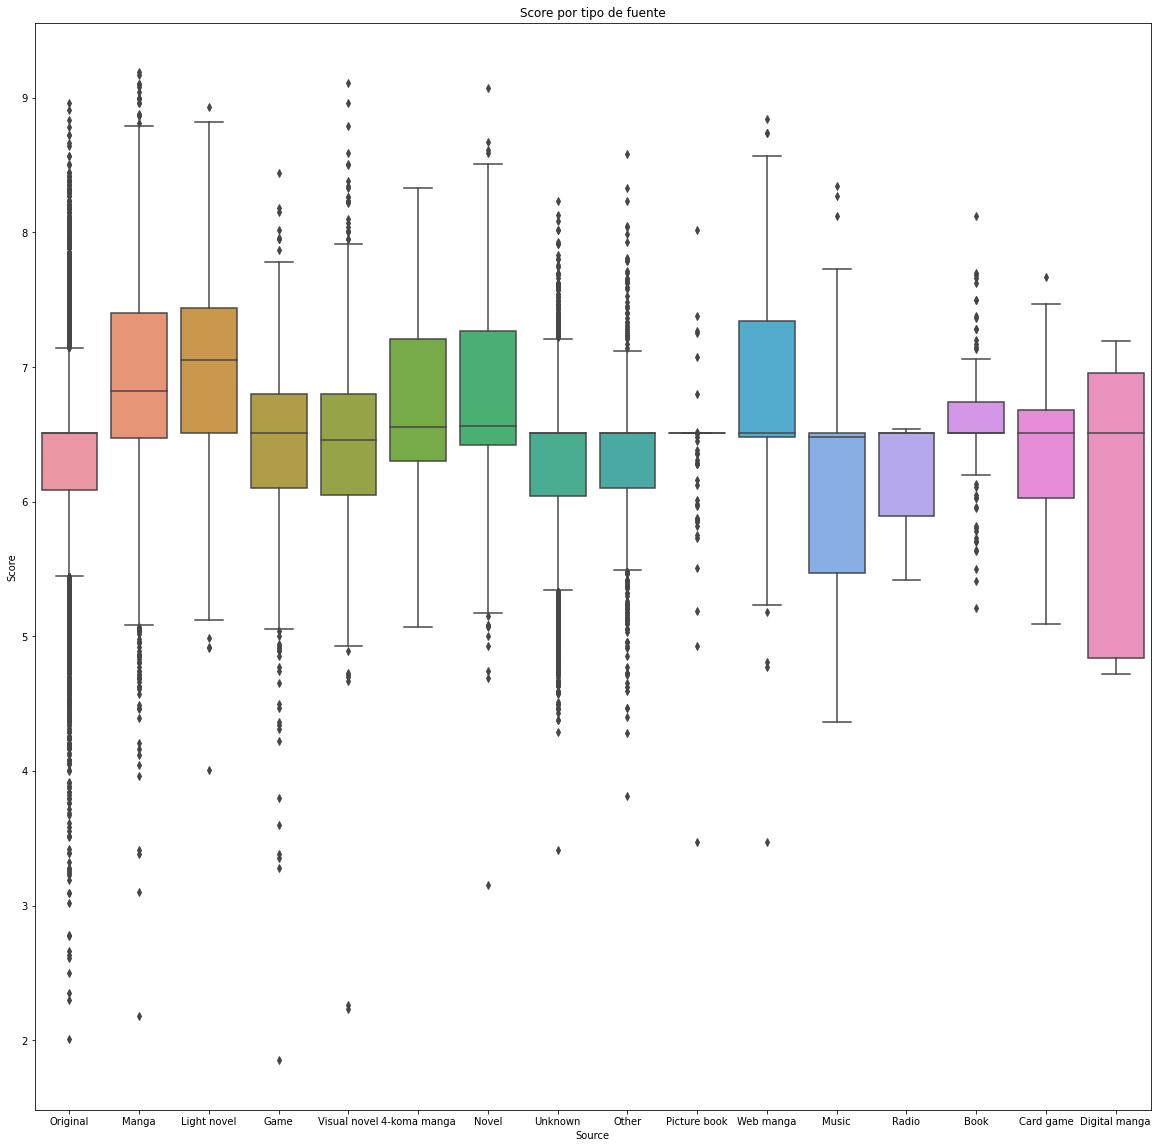

In [62]:
plt.figure(figsize=(20,20)) 
sns.boxplot(y = 'Score', x = 'Source', data = dfanime_imp).set(title='Score por tipo de fuente')
plt.show()

In [63]:
fig = px.box(dfanime_imp, x="Source", y="Score")
fig.show()

La mayoría de las categorías presentan outliers. Los anime basados en manga y novelas ligeras son los que tienen mejores puntajes. La categoría manga digital no tiene outliers pero es la categoría con los datos más dispersos

In [64]:
#Análisis de numérica vs. categórica (Promedio de Score segun origen del anime)
dfanime_imp.groupby('Source')['Score'].mean()

Source
4-koma manga     6.717778
Book             6.574285
Card game        6.380469
Digital manga    6.082667
Game             6.421602
Light novel      7.016940
Manga            6.874701
Music            6.096877
Novel            6.785372
Original         6.355758
Other            6.327939
Picture book     6.435374
Radio            6.217500
Unknown          6.277905
Visual novel     6.431490
Web manga        6.768055
Name: Score, dtype: float64

In [65]:
#Análisis de numérica vs. categórica (Promedio de Score segun origen del anime)
dfanime_imp.groupby('Type')['Score'].mean()

Type
Movie      6.501798
Music      6.198230
ONA        6.295558
OVA        6.364756
Special    6.502493
TV         6.805054
Unknown    6.509999
Name: Score, dtype: float64

El puntaje de los anime por tipo y por fuente se presenta equitativo entre todas las categorías. 

# Análisis multivariado

In [66]:
fig = px.scatter(dfanime_imp, x="Popularity", y="Score",color='Season')
fig.show()

Al gráfico de la relación entre el puntaje y la popularidad le agrego el dato de la temporada. Se puede ver que los más populares y con puntaje más bajo la temporada es desconocida, mientras que para los anime con mayor puntaje pero menos populares la temporada si es conocida.

In [67]:
fig = px.scatter(dfanime_imp, x="Popularity", y="Score",color='Type')
fig.show()

Al gráfico de la relación entre el puntaje y la popularidad le agrego el dato del tipo de anime. Se puede ver que los más popualres y con puntaje más bajo la wl tipo es desconocido, mientras que los anime con mayor puntaje pero menos populares son series de TV.

In [68]:
fig = px.scatter(dfanime_imp, x="Popularity", y="Score",color='Source')
fig.show()

Se puede observar que las Manga son las que tienen mayor Score pero son las menos populares y las Originales son las más populares, compitiendo muy de cerca con las de Música.

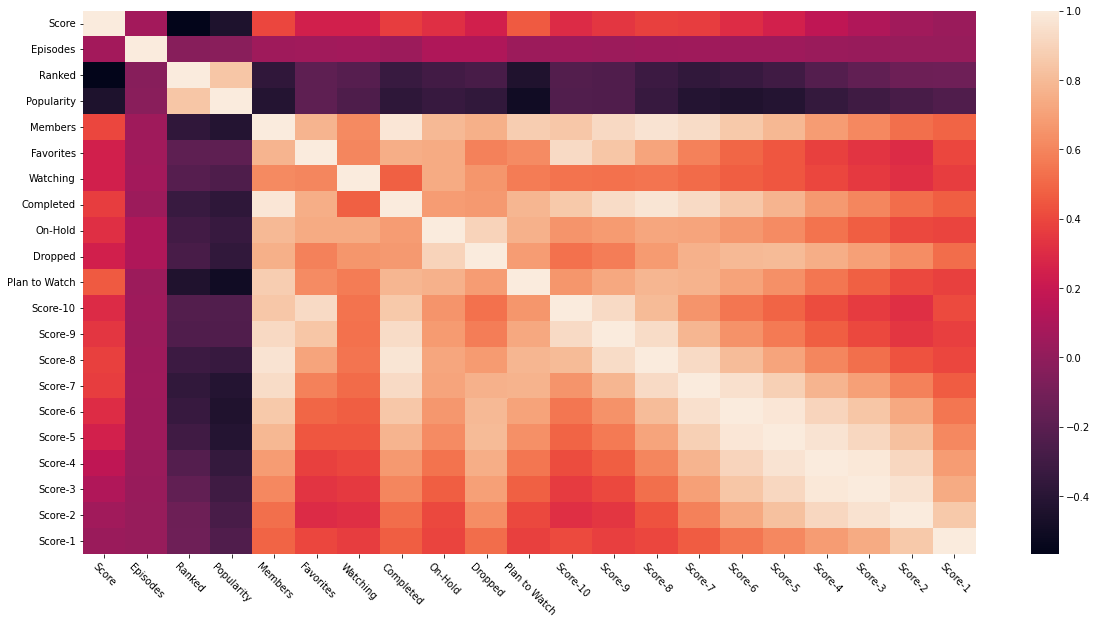

In [69]:
#Matriz de correlación
plt.figure(figsize=(20,10));
sns.heatmap(dfanime_imp.corr());
plt.xticks(rotation=-45);

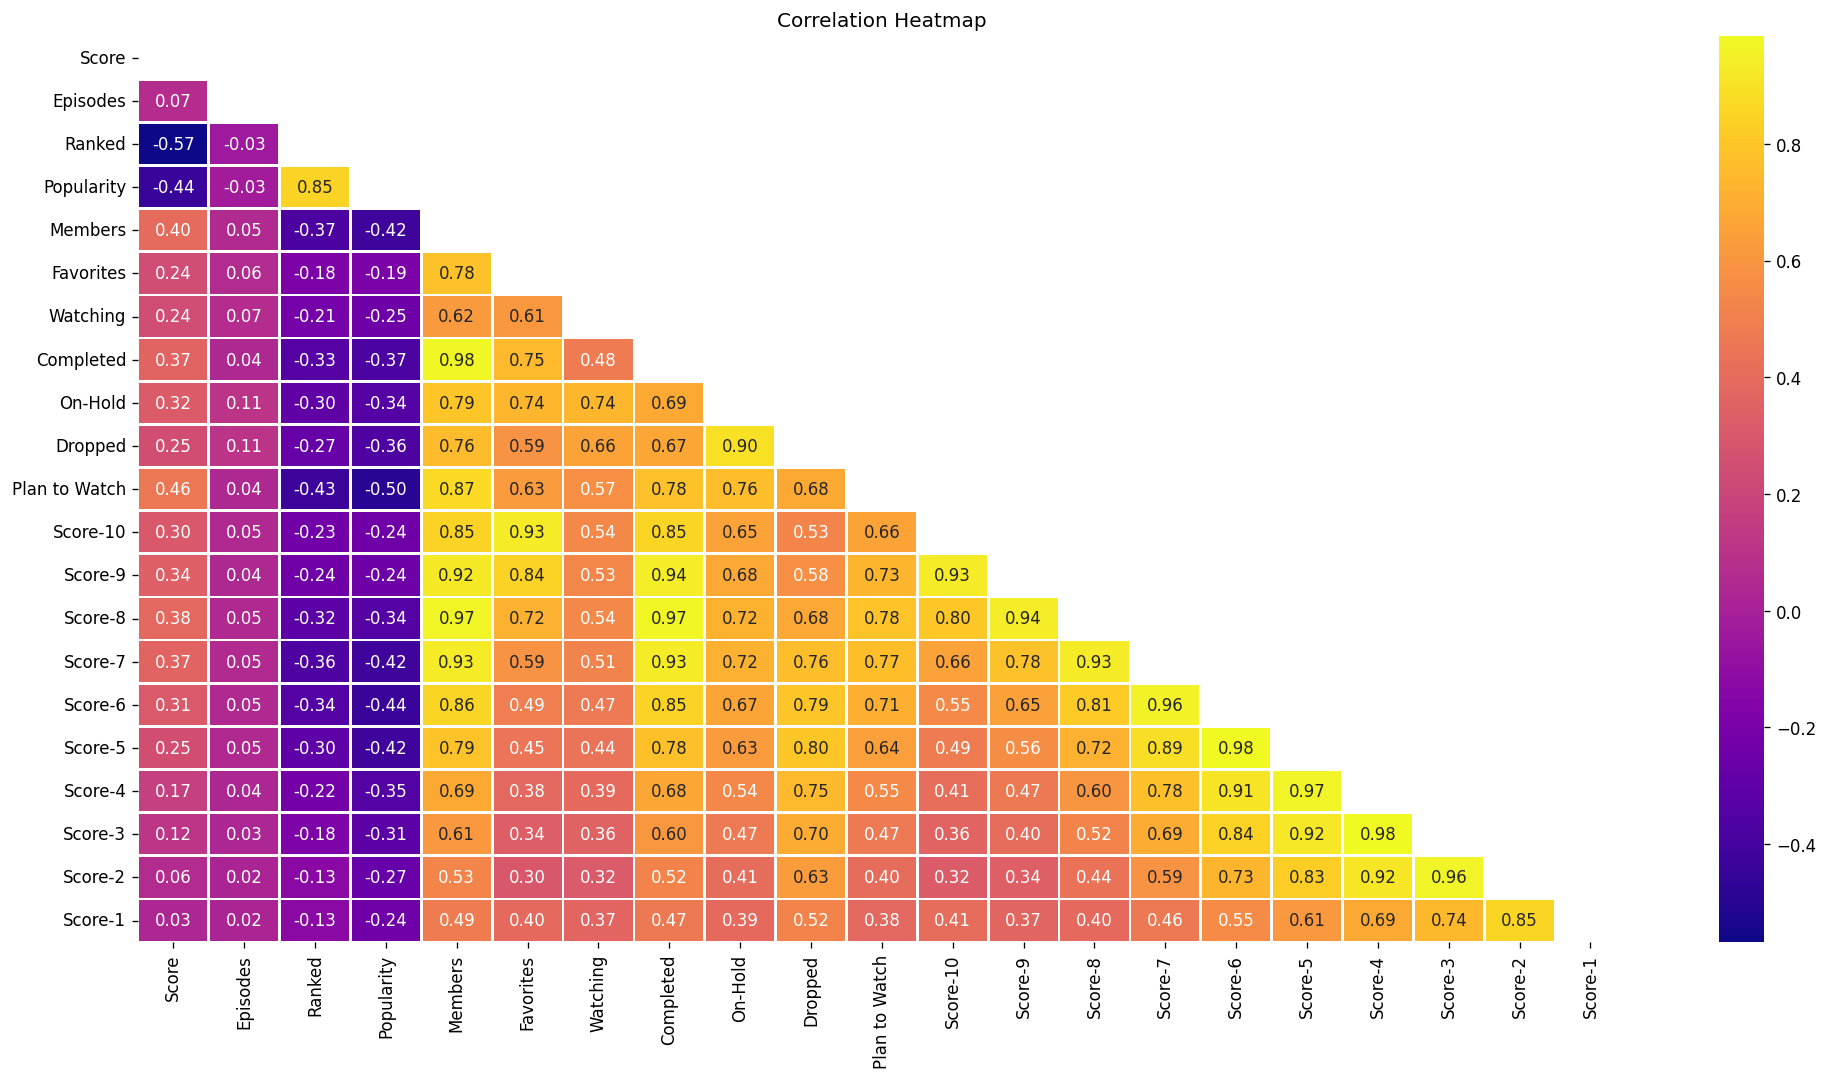

In [70]:
#Correlaciones
plt.figure(dpi = 120,figsize= (20,10))
mask = np.triu(np.ones_like(dfanime_imp.corr(),dtype = bool))
sns.heatmap(dfanime_imp.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

La variable miembros que agregaron al anime en alguna lista tiene una fuerte correlación con todos los puntajes y con las variables referidas a las listas. Las variables referidas a las listas también tienen una fuerte correlación con los puntajes. Esto hay que tenerlo en cuenta a la hora de hacer el modelo porque cuando las variables explicativas están muy correlacionadas hay multicolinealidad, lo que provoca que las varianzas se inflen y haya coeficientes que den no significativos. Las variables episodios, puesto en el raking, popularidad y puntaje promedio no tiene correlación con ninguna variable.

# Arboles de Desicion

In [71]:
#Se importan la librerias a utilizar
from sklearn import datasets

In [72]:
dataset = dfanime_imp.drop(dfanime_imp[columnsString], axis = 1)

In [73]:
dataset.head(5)

,Score,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,8.78,26.0,28.0,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,8.39,1.0,159.0,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,8.24,26.0,266.0,201.0,558913.0,12944.0,29113.0,343492.0,25465.0,13925.0,146918.0,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7.27,26.0,2481.0,1467.0,94683.0,587.0,4300.0,46165.0,5121.0,5378.0,33719.0,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,6.98,52.0,3710.0,4369.0,13224.0,18.0,642.0,7314.0,766.0,1108.0,3394.0,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [74]:
#Convirtiendo a integer para poder aplicar Decision Tree
dataset = dataset.astype(int)

In [75]:
dataset.dtypes

Score            int64
Episodes         int64
Ranked           int64
Popularity       int64
Members          int64
Favorites        int64
Watching         int64
Completed        int64
On-Hold          int64
Dropped          int64
Plan to Watch    int64
Score-10         int64
Score-9          int64
Score-8          int64
Score-7          int64
Score-6          int64
Score-5          int64
Score-4          int64
Score-3          int64
Score-2          int64
Score-1          int64
dtype: object

In [76]:
#Seleccionamos todas las columnas
X = dataset.drop("Score", axis=1) #Elimino del dataset la variable a predecir
y = dataset.Score #Defino el target

In [77]:
#Separamos en train y test
from sklearn.model_selection import train_test_split


In [78]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos. 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
#Arbol de decisión
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2, random_state = 42)

In [80]:
#Entrenamos el modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [81]:
#Realizo una predicción
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [82]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0    0    0    0    3    0    0    0]
 [   0    0    0    0   13    0    0    0]
 [   0    0    0    0  122    0    0    0]
 [   0    0    0    0  863    0    0    0]
 [   0    0    0    0 3140    0    0    0]
 [   0    0    0    0   35  934    0    0]
 [   0    0    0    0    0    0  154    0]
 [   0    0    0    0    0    0    5    0]]


In [83]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8015130562108517
% de aciertos sobre el set de evaluación: 0.8024293034731448


# KNN

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [85]:
dfanime_imp.head(3)

,Score,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Name,English name,Type,Producers,Licensors,Studios,Rating,Source,Start date,End date,Season,Year,Genre 1,Genre 2
0,8.78,26.0,28.0,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,Cowboy Bebop,Cowboy Bebop,TV,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,R - 17+ (violence & profanity),Original,"Apr 3, 1998","Apr 24, 1999",Spring,1998,Action,Adventure
1,8.39,1.0,159.0,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,Movie,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,R - 17+ (violence & profanity),Original,"Sep 1, 2001",Unknown,Unknown,Unknown,Action,Drama
2,8.24,26.0,266.0,201.0,558913.0,12944.0,29113.0,343492.0,25465.0,13925.0,146918.0,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,Trigun,Trigun,TV,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,PG-13 - Teens 13 or older,Manga,"Apr 1, 1998","Sep 30, 1998",Spring,1998,Action,Sci-Fi


In [86]:
#Se utilizan tres variables para utilizar en el modelo Ranked, Score y Source
dataKNN = {
    'Ranked': dfanime_imp.Ranked,
    'Score': dfanime_imp.Score,
    'Source': dfanime_imp.Source
}


In [87]:
#Asignamos datos para poder realizar la predicción de Source o Fuente 
punto_nuevo = {'Ranked': [1],
               'Score': [9.2]}

In [88]:
#Convirtiendo punto a Dataframe
df = pd.DataFrame(dataKNN)
punto_nuevo = pd.DataFrame(punto_nuevo)

In [89]:
df

,Ranked,Score,Source
0,28.00,8.780000,Original
1,159.00,8.390000,Original
2,266.00,8.240000,Manga
3,2481.00,7.270000,Original
4,3710.00,6.980000,Manga
...,...,...,...
17557,7895.21,6.509999,Novel
17558,7895.21,6.509999,Manga
17559,7895.21,6.509999,Visual novel
17560,7895.21,6.509999,Manga


In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
X = df[['Ranked', 'Score']]
y = df[['Source']]

In [91]:
knn.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=3)

In [92]:
prediccion = knn.predict(punto_nuevo)
print(prediccion)

['Manga']


# Random Forest

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [94]:
#Separamos en X e y
X2 = dataset.drop(["Score"], axis=1)
y2 = dataset["Score"]

In [95]:
#Separamos en train y test
(X2_train, X2_test,
y2_train, y2_test) = train_test_split(X2,
                                    y2,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [96]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree2 = DecisionTreeClassifier(random_state=11)
tree2.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=11)

In [97]:
y2_test_pred = tree2.predict(X_test) #Prediccion en Test

In [98]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test2_accuracy = accuracy_score(y2_test, y2_test_pred)

print('% de aciertos sobre el set de evaluación:',test2_accuracy)

% de aciertos sobre el set de evaluación: 0.40842664642247106


In [99]:
#Creamos un random forest
model2 = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model2.fit(X2_train, y2_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [100]:
y2_test_pred = model2.predict(X_test) #Prediccion en Test

In [101]:
#Calculo el accuracy en Test
test2_accuracy = accuracy_score(y2_test, y2_test_pred)

print('% de aciertos sobre el set de evaluación:',test2_accuracy)

% de aciertos sobre el set de evaluación: 0.410134750427026


Se obtiene casi el mismo % de presicion usando un desicion tree o un random forest (1% de diferencia)

#Regresión

In [102]:
dfanime_imp.head(5)

,Score,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Name,English name,Type,Producers,Licensors,Studios,Rating,Source,Start date,End date,Season,Year,Genre 1,Genre 2
0,8.78,26.0,28.0,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,Cowboy Bebop,Cowboy Bebop,TV,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,R - 17+ (violence & profanity),Original,"Apr 3, 1998","Apr 24, 1999",Spring,1998,Action,Adventure
1,8.39,1.0,159.0,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,Movie,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,R - 17+ (violence & profanity),Original,"Sep 1, 2001",Unknown,Unknown,Unknown,Action,Drama
2,8.24,26.0,266.0,201.0,558913.0,12944.0,29113.0,343492.0,25465.0,13925.0,146918.0,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,Trigun,Trigun,TV,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,PG-13 - Teens 13 or older,Manga,"Apr 1, 1998","Sep 30, 1998",Spring,1998,Action,Sci-Fi
3,7.27,26.0,2481.0,1467.0,94683.0,587.0,4300.0,46165.0,5121.0,5378.0,33719.0,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,Witch Hunter Robin,Witch Hunter Robin,TV,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,PG-13 - Teens 13 or older,Original,"Jul 2, 2002","Dec 24, 2002",Summer,2002,Action,Mystery
4,6.98,52.0,3710.0,4369.0,13224.0,18.0,642.0,7314.0,766.0,1108.0,3394.0,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,Bouken Ou Beet,Beet the Vandel Buster,TV,"TV Tokyo, Dentsu",Unknown,Toei Animation,PG - Children,Manga,"Sep 30, 2004","Sep 29, 2005",Fall,2004,Adventure,Fantasy


In [103]:
dfanime_imp['English name']=dfanime_imp['English name'].replace(r'Unknown', np.NaN)
dfanime_imp['English name'].fillna(dfanime_imp.Name, inplace=True)

In [104]:
dfanime_imp

,Score,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Name,English name,Type,Producers,Licensors,Studios,Rating,Source,Start date,End date,Season,Year,Genre 1,Genre 2
0,8.780000,26.000000,28.00,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0,229170.000000,182126.000000,131625.000000,62330.000000,20688.000000,8904.000000,3184.000000,1357.000000,741.00000,1580.00000,Cowboy Bebop,Cowboy Bebop,TV,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,R - 17+ (violence & profanity),Original,"Apr 3, 1998","Apr 24, 1999",Spring,1998,Action,Adventure
1,8.390000,1.000000,159.00,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0,30043.000000,49201.000000,49505.000000,22632.000000,5805.000000,1877.000000,577.000000,221.000000,109.00000,379.00000,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,Movie,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,R - 17+ (violence & profanity),Original,"Sep 1, 2001",Unknown,Unknown,Unknown,Action,Drama
2,8.240000,26.000000,266.00,201.0,558913.0,12944.0,29113.0,343492.0,25465.0,13925.0,146918.0,50229.000000,75651.000000,86142.000000,49432.000000,15376.000000,5838.000000,1965.000000,664.000000,316.00000,533.00000,Trigun,Trigun,TV,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,PG-13 - Teens 13 or older,Manga,"Apr 1, 1998","Sep 30, 1998",Spring,1998,Action,Sci-Fi
3,7.270000,26.000000,2481.00,1467.0,94683.0,587.0,4300.0,46165.0,5121.0,5378.0,33719.0,2182.000000,4806.000000,10128.000000,11618.000000,5709.000000,2920.000000,1083.000000,353.000000,164.00000,131.00000,Witch Hunter Robin,Witch Hunter Robin,TV,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,PG-13 - Teens 13 or older,Original,"Jul 2, 2002","Dec 24, 2002",Summer,2002,Action,Mystery
4,6.980000,52.000000,3710.00,4369.0,13224.0,18.0,642.0,7314.0,766.0,1108.0,3394.0,312.000000,529.000000,1242.000000,1713.000000,1068.000000,634.000000,265.000000,83.000000,50.00000,27.00000,Bouken Ou Beet,Beet the Vandel Buster,TV,"TV Tokyo, Dentsu",Unknown,Toei Animation,PG - Children,Manga,"Sep 30, 2004","Sep 29, 2005",Fall,2004,Adventure,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,6.509999,11.525519,7895.21,13116.0,354.0,6.0,0.0,0.0,0.0,0.0,354.0,2546.182715,3905.437027,4846.905194,1.000000,1964.125682,990.303982,453.539162,212.773547,128.39524,123.07525,Daomu Biji Zhi Qinling Shen Shu,Daomu Biji Zhi Qinling Shen Shu,ONA,Unknown,Unknown,Unknown,Unknown,Novel,"Apr 4, 2021",?,Unknown,Unknown,Adventure,Mystery
17558,6.509999,11.525519,7895.21,17562.0,7010.0,70.0,14.0,0.0,14.0,0.0,6982.0,2546.182715,3905.437027,4846.905194,3997.244329,1964.125682,990.303982,453.539162,212.773547,128.39524,123.07525,Mieruko-chan,Mieruko-chan,TV,Kadokawa,Unknown,Passione,Unknown,Manga,2021,?,Unknown,Unknown,Comedy,Horror
17559,6.509999,11.525519,7895.21,17558.0,11309.0,48.0,3.0,0.0,0.0,0.0,11306.0,1.000000,3905.437027,4846.905194,3997.244329,1964.125682,990.303982,453.539162,212.773547,128.39524,123.07525,Higurashi no Naku Koro ni Sotsu,Higurashi:When They Cry – SOTSU,TV,Unknown,Unknown,Unknown,R - 17+ (violence & profanity),Visual novel,"Jul, 2021",?,Summer,2021,Mystery,Dementia
17560,6.509999,11.525519,7895.21,17565.0,1386.0,2.0,13.0,2.0,2.0,1.0,1368.0,2546.182715,3905.437027,4846.905194,3997.244329,1964.125682,990.303982,453.539162,212.773547,128.39524,123.07525,Yama no Susume: Next Summit,Yama no Susume: Next Summit,TV,Kadokawa,Unknown,8bit,PG-13 - Teens 13 or older,Manga,Unknown,Unknown,Unknown,Unknown,Adventure,Slice of Life


In [105]:
animereg= dfanime_imp.drop(['Producers', 'Licensors', 'Studios', 'Genre 2', 
                               'Score-1','Score-2','Score-3','Score-4','Score-5','Score-6','Score-7','Score-8',
                               'Score-9','Score-10', 'English name', 'Name', 'Start date', 'End date', 'Year'], axis= 1)

Se eliminan las variables que se piensa que no pueden aportar al modelo. 

In [106]:
animereg.head(5)

,Score,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Type,Rating,Source,Season,Genre 1
0,8.78,26.0,28.0,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0,TV,R - 17+ (violence & profanity),Original,Spring,Action
1,8.39,1.0,159.0,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0,Movie,R - 17+ (violence & profanity),Original,Unknown,Action
2,8.24,26.0,266.0,201.0,558913.0,12944.0,29113.0,343492.0,25465.0,13925.0,146918.0,TV,PG-13 - Teens 13 or older,Manga,Spring,Action
3,7.27,26.0,2481.0,1467.0,94683.0,587.0,4300.0,46165.0,5121.0,5378.0,33719.0,TV,PG-13 - Teens 13 or older,Original,Summer,Action
4,6.98,52.0,3710.0,4369.0,13224.0,18.0,642.0,7314.0,766.0,1108.0,3394.0,TV,PG - Children,Manga,Fall,Adventure


In [107]:
reganime= pd.get_dummies(animereg, columns= ['Type', 'Rating', 'Source', 'Season', 'Genre 1'])

In [108]:
reganime.head(5)

,Score,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Type_Movie,Type_Music,Type_ONA,Type_OVA,Type_Special,Type_TV,Type_Unknown,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Rx - Hentai,Rating_Unknown,Source_4-koma manga,Source_Book,Source_Card game,Source_Digital manga,Source_Game,Source_Light novel,Source_Manga,Source_Music,Source_Novel,Source_Original,Source_Other,Source_Picture book,Source_Radio,Source_Unknown,Source_Visual novel,Source_Web manga,Season_Fall,Season_Spring,Season_Summer,Season_Unknown,Season_Winter,Genre 1_Action,Genre 1_Adventure,Genre 1_Cars,Genre 1_Comedy,Genre 1_Dementia,Genre 1_Demons,Genre 1_Drama,Genre 1_Ecchi,Genre 1_Fantasy,Genre 1_Game,Genre 1_Harem,Genre 1_Hentai,Genre 1_Historical,Genre 1_Horror,Genre 1_Josei,Genre 1_Kids,Genre 1_Magic,Genre 1_Martial Arts,Genre 1_Mecha,Genre 1_Military,Genre 1_Music,Genre 1_Mystery,Genre 1_Parody,Genre 1_Police,Genre 1_Psychological,Genre 1_Romance,Genre 1_Samurai,Genre 1_School,Genre 1_Sci-Fi,Genre 1_Seinen,Genre 1_Shoujo,Genre 1_Shounen,Genre 1_Shounen Ai,Genre 1_Slice of Life,Genre 1_Space,Genre 1_Sports,Genre 1_Super Power,Genre 1_Supernatural,Genre 1_Thriller,Genre 1_Unknown,Genre 1_Vampire,Genre 1_Yaoi
0,8.78,26.0,28.0,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.39,1.0,159.0,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8.24,26.0,266.0,201.0,558913.0,12944.0,29113.0,343492.0,25465.0,13925.0,146918.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.27,26.0,2481.0,1467.0,94683.0,587.0,4300.0,46165.0,5121.0,5378.0,33719.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6.98,52.0,3710.0,4369.0,13224.0,18.0,642.0,7314.0,766.0,1108.0,3394.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
reganime.columns

Index(['Score', 'Episodes', 'Ranked', 'Popularity', 'Members', 'Favorites',
       'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch',
       'Type_Movie', 'Type_Music', 'Type_ONA', 'Type_OVA', 'Type_Special',
       'Type_TV', 'Type_Unknown', 'Rating_G - All Ages',
       'Rating_PG - Children', 'Rating_PG-13 - Teens 13 or older',
       'Rating_R - 17+ (violence & profanity)', 'Rating_R+ - Mild Nudity',
       'Rating_Rx - Hentai', 'Rating_Unknown', 'Source_4-koma manga',
       'Source_Book', 'Source_Card game', 'Source_Digital manga',
       'Source_Game', 'Source_Light novel', 'Source_Manga', 'Source_Music',
       'Source_Novel', 'Source_Original', 'Source_Other',
       'Source_Picture book', 'Source_Radio', 'Source_Unknown',
       'Source_Visual novel', 'Source_Web manga', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Unknown', 'Season_Winter',
       'Genre 1_Action', 'Genre 1_Adventure', 'Genre 1_Cars', 'Genre 1_Comedy',
       'Genre 1_Dementia

In [110]:
#Preparación de datos
X = reganime[[ 'Episodes', 'Ranked', 'Popularity', 'Members', 'Favorites',
       'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch',
       'Type_Music', 'Type_ONA', 'Type_OVA', 'Type_Special', 'Type_TV',
        'Rating_PG - Children',
       'Rating_PG-13 - Teens 13 or older',
       'Rating_R - 17+ (violence & profanity)', 'Rating_R+ - Mild Nudity',
       'Rating_Rx - Hentai',  'Source_Book',
       'Source_Card game', 'Source_Digital manga', 'Source_Game',
       'Source_Light novel', 'Source_Manga', 'Source_Music', 'Source_Novel',
       'Source_Original', 'Source_Other', 'Source_Picture book',
       'Source_Radio',  'Source_Visual novel',
       'Source_Web manga', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Genre 1_Adventure', 'Genre 1_Cars', 'Genre 1_Comedy',
       'Genre 1_Dementia', 'Genre 1_Demons', 'Genre 1_Drama', 'Genre 1_Ecchi',
       'Genre 1_Fantasy', 'Genre 1_Game', 'Genre 1_Harem', 'Genre 1_Hentai',
       'Genre 1_Historical', 'Genre 1_Horror', 'Genre 1_Josei', 'Genre 1_Kids',
       'Genre 1_Magic', 'Genre 1_Martial Arts', 'Genre 1_Mecha',
       'Genre 1_Military', 'Genre 1_Music', 'Genre 1_Mystery',
       'Genre 1_Parody', 'Genre 1_Police', 'Genre 1_Psychological',
       'Genre 1_Romance', 'Genre 1_Samurai', 'Genre 1_School',
       'Genre 1_Sci-Fi', 'Genre 1_Seinen', 'Genre 1_Shoujo', 'Genre 1_Shounen',
       'Genre 1_Shounen Ai', 'Genre 1_Slice of Life', 'Genre 1_Space',
       'Genre 1_Sports', 'Genre 1_Super Power', 'Genre 1_Supernatural',
       'Genre 1_Thriller', 'Genre 1_Vampire',
       'Genre 1_Yaoi']]
y = reganime['Score']

Se deja afuera la categoría unknown en cada variable para que tome el valor de la constante en el modelo. 

In [111]:
#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [113]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Episodes,3.214141e-04
Ranked,-9.896010e-05
Popularity,2.912713e-05
Members,-4.163722e+06
Favorites,-1.724289e-05
...,...
Genre 1_Super Power,-4.161994e-01
Genre 1_Supernatural,-2.107736e-01
Genre 1_Thriller,-6.365580e-02
Genre 1_Vampire,-6.356287e-01


In [114]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

In [115]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
14192,7.140000,6.992584
5543,6.330000,6.449594
5721,5.180000,6.201281
12580,5.140000,6.234996
6946,5.650000,6.534588
...,...,...
3008,6.280000,6.588932
9861,6.509999,6.003802
5499,5.330000,6.043604
12704,6.509999,6.189171


In [116]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4135599597759521
Mean Squared Error: 0.2816422735936025
Root Mean Squared Error: 0.5306997961122677


In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
print("Coeficiente de Determinacion : {}".format(metrics.r2_score(y_true=y_test,y_pred=y_pred))) 

Coeficiente de Determinacion : 0.45489358725854123


#KNN

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20)

([<matplotlib.axis.XTick at 0x7f7c91b5c590>,
 <a list of 21 Text major ticklabel objects>)

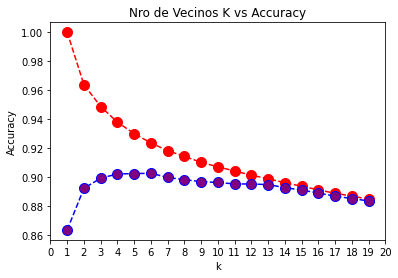

In [119]:
from sklearn.neighbors import KNeighborsRegressor
k_range = range(1, 20)
scores_train= []
scores_val= []
for k in k_range:
    knn =KNeighborsRegressor(n_neighbors = k,metric = 'minkowski')
    knn.fit(X_train, y_train)
    scores_train.append(knn.score(X_train, y_train))
    scores_val.append(knn.score(X_val, y_val))
plt.figure()
plt.plot(k_range, scores_train, color='red', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(k_range, scores_val, color='blue', linestyle='dashed', marker='o',markerfacecolor='purple', markersize=10)
plt.title('Nro de Vecinos K vs Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [125]:
#Elegimos k =4 , ya que tiene el Acuracy mas alto para la data de Validacion :
n_neighbors = 4
knn =KNeighborsRegressor(n_neighbors,metric = 'minkowski')
knn.fit(X_train, y_train)
y_val_pred = knn.predict(X_val)

In [126]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import math
#Validamos Metricas en la regression logistica
#MSE básicamente mide el error cuadrado promedio de nuestras predicciones. 
#Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores. 
#Cuanto mayor sea el valor del MSE, peor es el modelo. (Se sugiere compara 2 modelos para validar)

#El error cuadrático medio de la raíz entre los valores esperados y predichos se puede 
#calcular mediante la función mean_squared_error() de la biblioteca scikit-learn, el MSE debe acercarse a 0.
#Un valor RMSE y MAE perfecto es 0,0, lo que significa que todas las predicciones coincidieron exactamente con los valores esperados.

print("MSE: {}".format(mean_squared_error(y_val,y_val_pred)))#MSE
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_val,y_val_pred))))#RMSE
print("MAE : {}".format(mean_absolute_error(y_val, y_val_pred)))#MAE
print("Coeficiente de Determinacion : {}".format(r2_score(y_true=y_val,y_pred=y_val_pred))) #R^2

MSE: 0.056528831529815346
RMSE: 0.23775792632384593
MAE : 0.10698832860513058
Coeficiente de Determinacion : 0.9021722327983219


In [127]:
#Valor de la Prediccion : 
y_val_pred

array([6.50999919, 6.50999919, 6.50999919, ..., 7.3875    , 7.3025    ,
       6.0275    ])

In [128]:
df2 = pd.DataFrame({'Valores Orginales':y_val, 'Prediccion':y_val_pred.round(1)})
#Generamos una variacion para validar el error : 
df2['Variacion (%)'] = (((df2['Prediccion'] - df2['Valores Orginales'])/df2['Valores Orginales'])*100).round(1)
df2

,Valores Orginales,Prediccion,Variacion (%)
12142,6.509999,6.5,-0.2
5750,6.509999,6.5,-0.2
9203,6.509999,6.5,-0.2
6283,4.470000,4.3,-3.8
5358,6.060000,5.3,-12.5
...,...,...,...
5147,6.940000,6.9,-0.6
10301,6.640000,6.6,-0.6
8139,7.220000,7.4,2.5
9727,7.390000,7.3,-1.2


In [129]:
#Estadisticos Basicos de la Prediccion : 
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Valores Orginales,3513.0,6.503709,0.760266,2.3,6.18,6.509999,6.86,9.1
Prediccion,3513.0,6.499915,0.721736,3.1,6.20,6.500000,6.90,8.5
Variacion (%),3513.0,0.087020,4.419740,-27.8,-0.50,-0.200000,0.40,90.6
